## Solar Radiation Analysis

#### IMPORTING IMPORTANT LIBRARIES

In [139]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('dark_background')

### EXPLORATORY DATA ANALYSIS

#### IMPORTING DATASET

In [189]:
benin = pd.read_csv('../data/benin-malanville.csv')   
sierra = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo = pd.read_csv('../data/togo-dapaong_qc.csv')

In [27]:
benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [28]:
sierra.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [29]:
togo.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [30]:
# Datatypes
benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

**OBSERVATIONS**
* The dataset has 19 columnss and 525600 rows
* The dataset has 3 datatypes namely: object,int,and float 

In [31]:
sierra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

**OBSERVATIONS**
* The dataset has 19 columnss and 525600 rows
* The dataset has 3 datatypes namely: object,int,and float 

In [32]:
togo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

**OBSERVATIONS**
* The dataset has 19 columnss and 525600 rows
* The dataset has 3 datatypes namely: object,int,and float 

#### Summary Statistics

In [33]:
benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [34]:
sierra.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [35]:
togo.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


#### Data Quality Check

##### Data Quality check: Null values and duplicates

In [36]:
benin.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

**OBSERVATIONS**
* From the 19 columns the column `Comments` doesn't contain any values. The column needs to be deleted

In [37]:
sierra.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

**OBSERVATIONS**
* From the 19 columns the column `Comments` doesn't contain any values. The column needs to be deleted

In [38]:
togo.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

**OBSERVATIONS**
* From the 19 columns the column `Comments` doesn't contain any values. The column needs to be deleted

In [193]:
benin.drop('Comments', axis= 1, inplace=True)
togo.drop('Comments', axis= 1, inplace=True)
sierra.drop('Comments', axis= 1, inplace=True)

In [42]:
benin.duplicated().sum()

np.int64(0)

In [44]:
sierra.duplicated().sum()

np.int64(0)

In [45]:
togo.duplicated().sum()

np.int64(0)

**OBSERVATIONS**
* Datas don't contain duplicates.

##### Data Quality check: Negative numbers

In [69]:
numeric_col = benin.select_dtypes(exclude='object').columns

negative_col = (benin[numeric_col] < 0).any()
negative_col = negative_col[negative_col].index.to_list()
print(f"The negative columns are {negative_col}")

benin[negative_col] = benin[negative_col].clip(lower=0)

The negative columns are ['GHI', 'DNI', 'DHI']


In [70]:
numeric_col = sierra.select_dtypes(exclude='object').columns

negative_col = (sierra[numeric_col] < 0).any()
negative_col = negative_col[negative_col].index.to_list()
print(f"The negative columns are {negative_col}")

sierra[negative_col] = sierra[negative_col].clip(lower=0)

The negative columns are ['GHI', 'DNI', 'DHI']


In [71]:
numeric_col = togo.select_dtypes(exclude='object').columns

negative_col = (togo[numeric_col] < 0).any()
negative_col = negative_col[negative_col].index.to_list()
print(f"The negative columns are {negative_col}")

togo[negative_col] = togo[negative_col].clip(lower=0)

The negative columns are ['GHI']


##### Data Quality check: Outliers

In [115]:
def detect_outliers(data: pd.DataFrame):
    outliers = {}

    numeric_col = ['ModA', 'ModB', 'WS', 'WSgust']
    threshold = 3
    
    for col in numeric_col:
        mean = np.mean(data[col])
        std = np.std(data[col])

        z_scores = (data[col] - mean) / std
        
        outlier_data = data[col][np.abs(z_scores) > threshold].tolist()
        outliers[col] = outlier_data

    return outliers
        

In [116]:
benin_outliers = detect_outliers(benin)
print(f'Outliers for Benin-malanville:\n{benin_outliers}')
print(f'Columns that contain outliers:\n{list(benin_outliers.keys())}')

Outliers for Benin-malanville:
{'ModA': [1281.5, 1267.3, 1218.0, 1271.0, 1305.6, 1220.0, 1320.5, 1342.3, 1312.0, 1321.5, 1306.2, 1236.9, 1274.9, 1292.0, 1313.8, 1324.3, 1270.0, 1217.8, 1228.5, 1236.8, 1219.3, 1248.4, 1233.8, 1234.8, 1266.1, 1224.0, 1281.3], 'ModB': [1210.3, 1281.5, 1267.3, 1217.0, 1271.0, 1305.6, 1222.0, 1320.5, 1342.3, 1215.0, 1312.0, 1321.5, 1306.2, 1180.0, 1194.0, 1236.9, 1274.9, 1194.0, 1201.0, 1190.0, 1292.0, 1313.8, 1324.3, 1270.0, 1219.0, 1184.0, 1217.8, 1198.0, 1184.0, 1230.0, 1236.0, 1209.0, 1186.0, 1194.0, 1198.0, 1215.0, 1195.0, 1191.2, 1182.4, 1219.3, 1248.4, 1246.0, 1212.0, 1234.8, 1200.0, 1195.0, 1199.0, 1193.0, 1211.0, 1179.0, 1200.0, 1183.0, 1205.0, 1220.0, 1277.0, 1198.0, 1179.0, 1188.0, 1195.0, 1189.0, 1180.0, 1194.0, 1179.0], 'WS': [7.9, 8.2, 7.6, 7.5, 8.1, 7.4, 7.0, 8.0, 9.3, 7.8, 7.4, 8.4, 8.9, 7.9, 8.8, 8.9, 8.2, 7.3, 9.0, 8.8, 7.5, 7.7, 8.3, 7.8, 7.6, 8.6, 8.0, 7.2, 7.2, 7.8, 8.0, 10.9, 11.7, 12.8, 12.4, 12.6, 12.3, 14.3, 14.9, 13.2, 12.2, 13.3, 

In [117]:
sierra_outliers = detect_outliers(sierra)
print(f'Outliers for Sierraleone-bumbuna:\n{sierra_outliers}')
print(f'Columns that contain outliers:\n{list(sierra_outliers.keys())}')

Outliers for Sierraleone-bumbuna:
{'ModA': [1142.0, 1193.0, 1163.0, 1237.0, 1132.0, 1166.0, 1151.0, 1117.0, 1136.0, 1139.0, 1189.0, 1202.0, 1226.0, 1219.0, 1141.0, 1184.0, 1259.0, 1171.0, 1119.0, 1137.0, 1185.0, 1155.0, 1148.0, 1139.0, 1141.0, 1143.0, 1135.0, 1128.0, 1122.0, 1119.0, 1119.0, 1113.0, 1146.0, 1130.0, 1172.0, 1184.0, 1174.0, 1159.0, 1135.0, 1121.0, 1127.0, 1136.0, 1131.0, 1128.0, 1127.0, 1122.0, 1115.0, 1128.0, 1137.0, 1115.0, 1117.0, 1139.0, 1148.0, 1165.0, 1142.0, 1184.0, 1185.0, 1169.0, 1127.0, 1122.0, 1112.0, 1125.0, 1126.0, 1128.0, 1133.0, 1113.0, 1110.0, 1113.0, 1136.0, 1165.0, 1111.0, 1131.0, 1126.0, 1120.0, 1153.0, 1144.0, 1120.0, 1133.0, 1128.0, 1139.0, 1154.0, 1111.0, 1167.0, 1171.0, 1181.0, 1199.0, 1206.0, 1212.0, 1218.0, 1209.0, 1190.0, 1171.0, 1148.0, 1115.0, 1121.0, 1115.0, 1117.0, 1118.0, 1172.0, 1126.0, 1139.0, 1147.0, 1113.0, 1141.0, 1119.0, 1146.0, 1227.0, 1221.0, 1234.0, 1138.0, 1142.0, 1127.0, 1118.0, 1124.0, 1119.0, 1124.0, 1316.0, 1282.0, 1285.0, 1143

In [118]:
togo_outliers = detect_outliers(togo)
print(f'Outliers for togo-dapaong:\n{togo_outliers}')
print(f'Columns that contain outliers:\n{list(togo_outliers.keys())}')

Outliers for togo-dapaong:
{'ModA': [1194.0, 1185.0, 1184.0, 1185.0, 1195.0, 1206.0, 1191.0, 1183.0, 1251.0, 1182.0, 1193.0, 1237.0, 1276.0, 1214.0, 1210.0, 1209.0, 1243.0, 1182.0, 1252.0, 1191.0, 1305.0, 1215.0, 1205.0, 1179.0, 1202.0, 1233.0, 1184.0, 1222.0, 1299.0, 1227.0, 1220.0, 1325.0, 1327.0, 1188.0, 1185.0, 1179.0, 1246.0, 1209.0, 1186.0, 1188.0, 1252.0, 1194.0, 1221.0, 1228.0, 1278.0, 1260.0, 1201.0, 1289.0, 1287.0, 1182.0, 1188.0, 1205.0, 1224.0, 1179.0, 1195.0, 1254.0, 1228.0, 1251.0, 1241.0, 1201.0, 1201.0, 1363.0, 1374.0, 1357.0, 1291.0, 1198.0, 1192.0, 1198.0, 1226.0, 1183.0, 1187.0, 1207.0, 1239.0, 1199.0, 1217.0, 1198.0, 1211.0, 1219.0, 1203.0, 1225.0, 1202.0, 1192.0, 1184.0, 1189.0, 1215.0, 1209.0, 1190.0, 1380.0, 1182.0, 1285.0, 1278.0, 1190.0, 1217.0, 1292.0, 1194.0, 1192.0, 1183.0, 1187.0, 1187.0, 1186.0, 1183.0, 1207.0, 1192.0, 1190.0, 1181.0, 1180.0, 1240.0, 1214.0, 1201.0, 1189.0, 1215.0, 1184.0, 1211.0, 1198.0, 1195.0, 1186.0, 1188.0, 1211.0, 1221.0, 1229.0, 122

#### Time Series Analysis

In [228]:
def data_grouper(data: pd.DataFrame) -> tuple:
    '''
    This function groups timeseries data by day, months and year

    Returns:
        tuple: A tuple containing three DataFrames - grouped by day, month, and year.
    '''

    benin['Timestamp'] = pd.to_datetime(benin['Timestamp'])
    benin.index = benin['Timestamp']
    sierra['Timestamp'] = pd.to_datetime(sierra['Timestamp'])
    sierra.index = sierra['Timestamp']
    togo['Timestamp'] = pd.to_datetime(togo['Timestamp'])
    togo.index = togo['Timestamp']

    day_data = data.groupby([data.index.month, data.index.day, data.index.year])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
    month_data = data.groupby([data.index.month, data.index.year])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
    year_data = data.groupby([data.index.year])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    return day_data, month_data, year_data


def plot_timeseries(data):

    day_data, month_data, year_data = data_grouper(data)
    day_data['Date'] = day_data.index.to_series().apply(lambda idx: pd.Timestamp(year=idx[2], month=idx[0], day=idx[1]).date())

    # plot for day data 
    fig, axes = plt.subplots(nrows=4, figsize=(10, 12))
    cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.suptitle('Day Data', fontsize = 16)
    for i, col in enumerate(cols):
        axes[i].plot(day_data['Date'], day_data[col])
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

    plt.xlabel('Timestamp')
    plt.tight_layout()
    plt.show()

    # plot for month data
    fig, axes = plt.subplots(nrows=4, figsize=(10, 12))
    cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.suptitle('Month Data', fontsize = 16)
    for i, col in enumerate(cols):
        month_data[col].plot(ax = axes[i])
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

    plt.xlabel('Timestamp')
    plt.tight_layout()
    plt.show()    

    # plot for year data
    fig, axes = plt.subplots(nrows=4, figsize=(10, 12), )
    cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.suptitle('Year Data', fontsize = 16)
    for i, col in enumerate(cols):
        year_data[col].plot(ax = axes[i])
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

    plt.xlabel('Timestamp')
    plt.tight_layout()
    plt.show()    


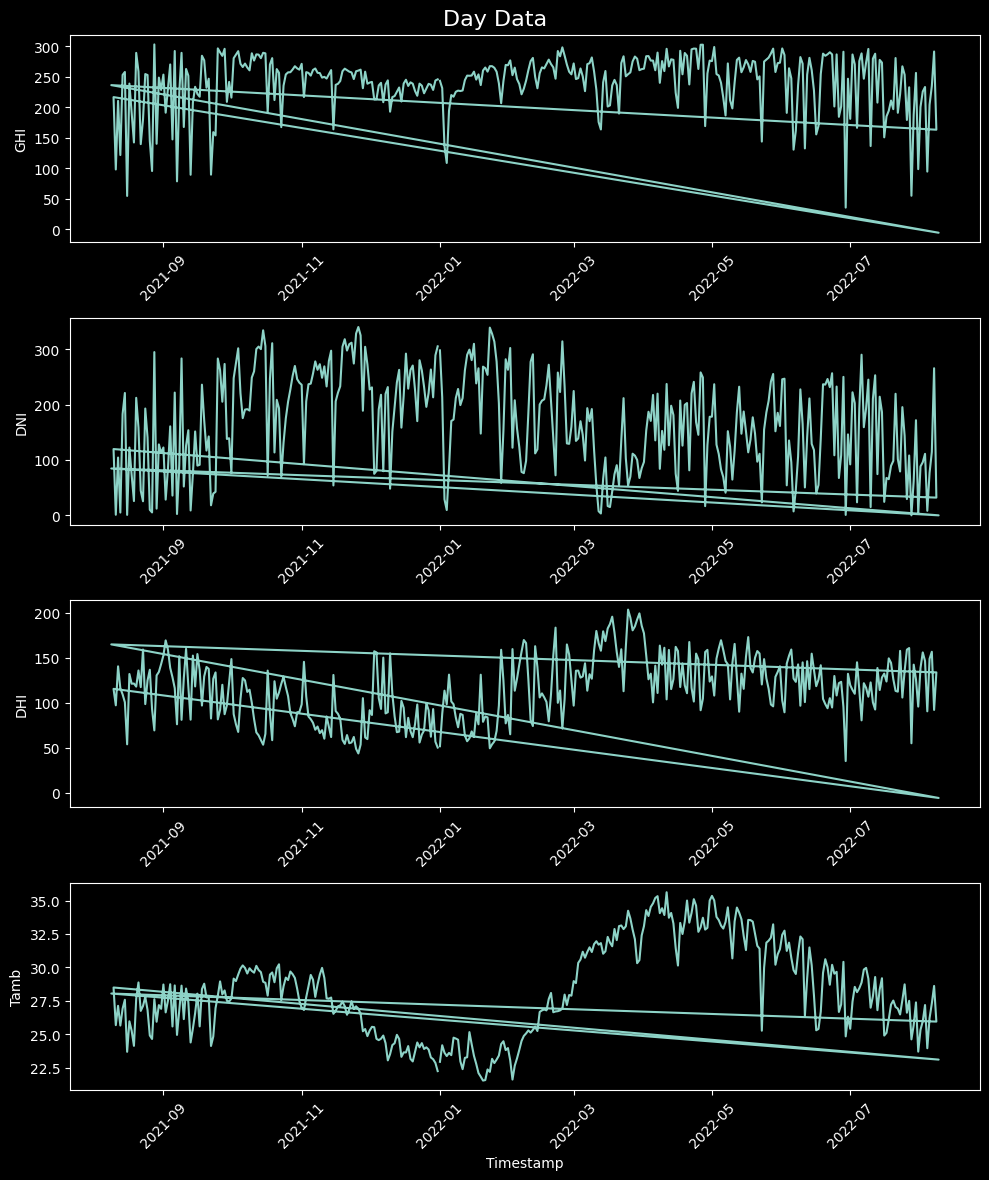

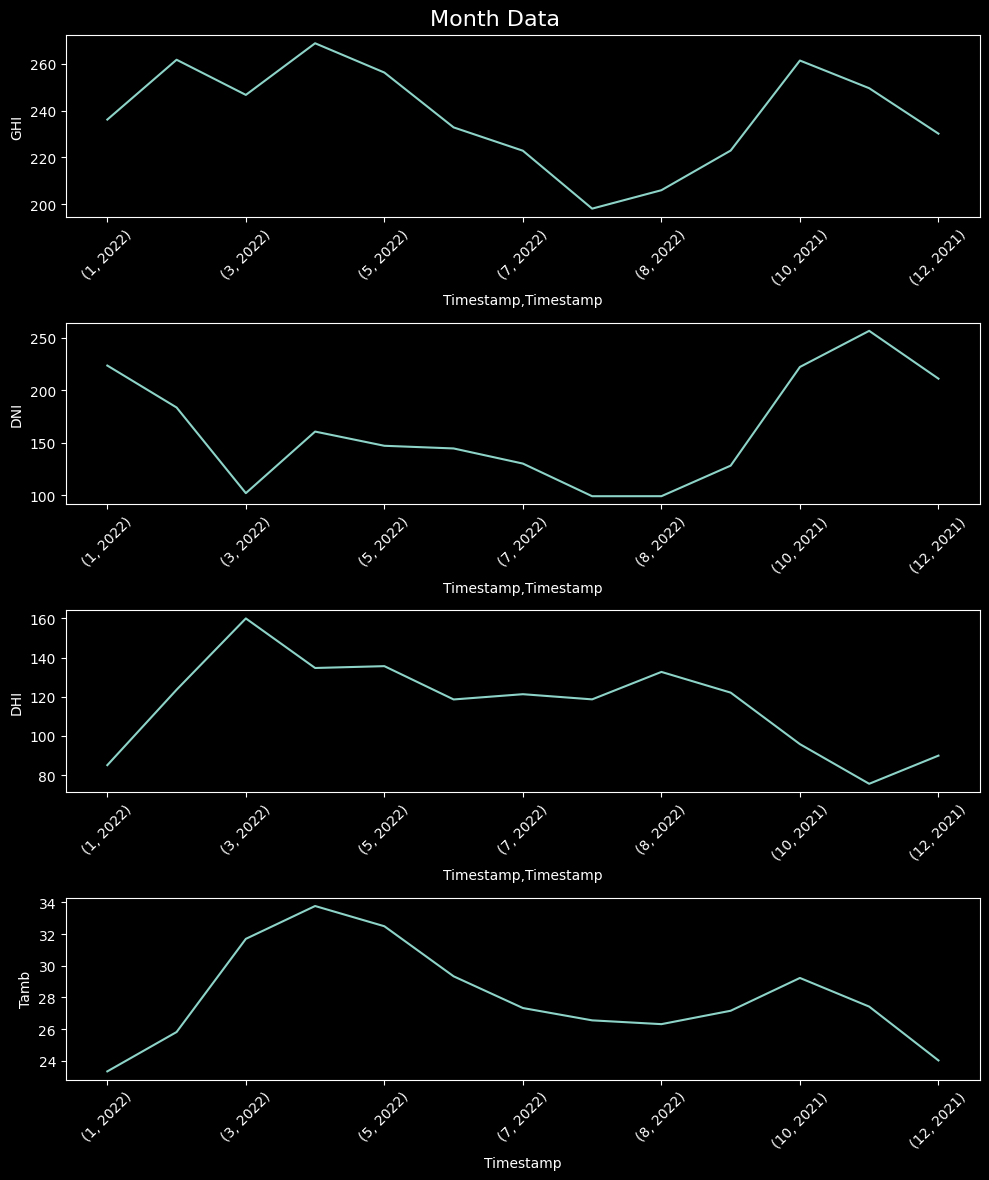

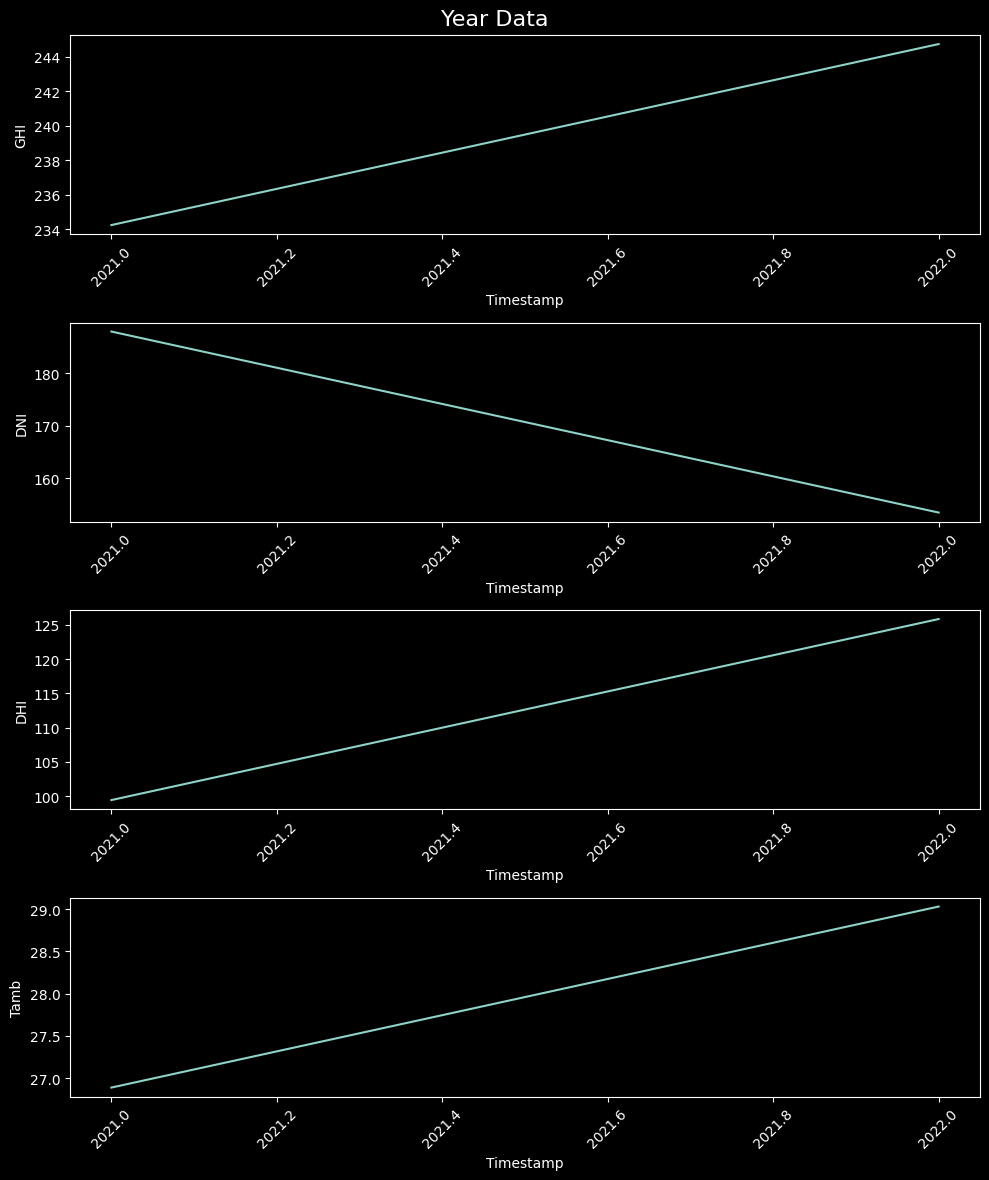

In [229]:
plot_timeseries(benin)